In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#modeling

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings


In [9]:
df = pd.read_csv('stud.csv')

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


preparing X, y vaariables

In [11]:
X = df.drop(columns=['math_score'], axis =1)
y = df['math_score']

In [12]:
#performing column transformation
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)



In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [16]:
#seperating the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [27]:
#creating a function for model evaluation

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae,rmse, r2

In [28]:
#models

models = {
    "Linear Regression" :LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor" :CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" :AdaBoostRegressor(),

}

model_list = []
r2_list =[]

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #evaluate train and test datasets
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print('------------------------------------------------')

    print('Model performance for training set :')
    print("-root mean squared error :{:.4f}".format(model_train_rmse))
    print("- Mean absolute error :{:.4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))

    print("-------------------------------------------------")
    print('Model performance for testing set :')
    print("-root mean squared error :{:.4f}".format(model_test_rmse))
    print("- Mean absolute error :{:.4f}".format(model_test_mae))
    print("- R2 :{:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print("=" *35)
    print('\n')


    





Linear Regression
------------------------------------------------
Model performance for training set :
-root mean squared error :5.3231
- Mean absolute error :4.2667
- R2 score: 0.8743
-------------------------------------------------
Model performance for testing set :
-root mean squared error :5.3940
- Mean absolute error :4.2148
- R2 :0.8804


Lasso
------------------------------------------------
Model performance for training set :
-root mean squared error :6.5938
- Mean absolute error :5.2063
- R2 score: 0.8071
-------------------------------------------------
Model performance for testing set :
-root mean squared error :6.5197
- Mean absolute error :5.1579
- R2 :0.8253


Ridge
------------------------------------------------
Model performance for training set :
-root mean squared error :5.3233
- Mean absolute error :4.2650
- R2 score: 0.8743
-------------------------------------------------
Model performance for testing set :
-root mean squared error :5.3904
- Mean absolute err

In [29]:
len(models)

9

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2_Score']).sort_values(by = ["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850582
8,AdaBoost Regressor,0.845880
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
4,Decision Tree,0.752176


since linearRegression have good r2_score we will use it 

In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) *100
print("Accuracy of the model is %.2f:" %score)

Accuracy of the model is 88.04:


plot y_pred and y_test

Text(0, 0.5, 'Predicted')

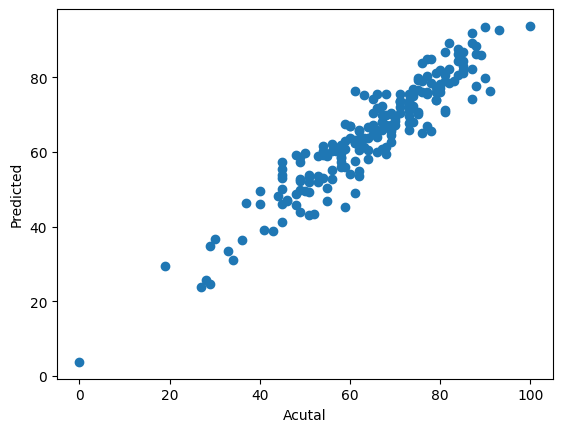

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel("Acutal")
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

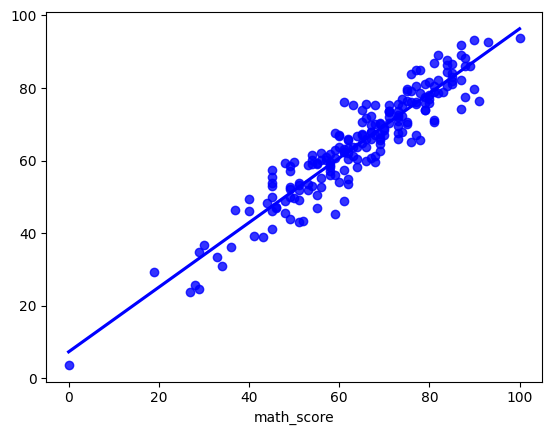

In [34]:
sns.regplot(x= y_test, y = y_pred, ci = None, color='blue')

In [35]:
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted Value': y_pred, 'Difference ':y_test - y_pred})
pred_df

,Actual value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
